# Linear prediction

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import lasso_path, enet_path

In [11]:
Housing = pd.read_csv('ahs_clean.zip', compression='zip')
y = Housing['LOGVALUE']
Housing['LOGSQFT'] = np.log(Housing['UNITSF'])
Housing['LOGLOT'] = np.log(Housing['LOT'])
Housing.head()

In [16]:
Xvars1 = ['LOGLOT','LOGSQFT','BEDRMS','BATHS']
X1 = Housing[Xvars1]
scores1 = sklearn.model_selection.cross_val_score(sklearn.linear_model.LinearRegression(), X1, y, scoring='neg_mean_squared_error')
print(scores1, "|", np.mean(scores1))

[-3.27831505 -0.21752742 -0.15081463 -0.33540603 -1.94579486] | -1.1855715978346066


In [15]:
Xvars2 = Xvars1 + ['REGION','METRO','KITCHEN','DISH', 'WASH','DRY','COOK','DENS','DINING', 
                   'FAMRM','HALFB','LIVING','OTHFN', 'RECRM','PORCH','SINK','LAUNDY', 
                   'FLOORS','CONDO','ROOMS','PLUMB', 'NOWIRE','AGE']
X2 = Housing[Xvars2]
scores2 = sklearn.model_selection.cross_val_score(sklearn.linear_model.LinearRegression(), X2, y, scoring='neg_mean_squared_error')
print(scores2, "|", np.mean(scores2))

[-3.0129257  -0.25544236 -0.22679496 -0.31701557 -1.71997747] | -1.1064312144583217


In [25]:
Xvars3 = Xvars2 + [n for n in Housing.columns if n.startswith('ROACH') | n.startswith('RATS') | n.startswith('WATER') | n.startswith('CELLAR') | n.startswith('NUM') | n.startswith('FREEZE')]
X3 = Housing[Xvars3]
scores3 = sklearn.model_selection.cross_val_score(sklearn.linear_model.LinearRegression(), X3, y, scoring='neg_mean_squared_error')
print(scores3, "|", np.mean(scores3))

[-2.93656085 -0.3011147  -0.22296832 -0.29663515 -1.68440252] | -1.0883363086464861


# Lasso

In [56]:
def path_plot(coefs, alphas):
    log_alphas = np.log(alphas)
    plt.figure()
    for coef_l in coefs:
        l1 = plt.plot(log_alphas, coef_l)

    plt.xlabel('Log(alpha)')
    plt.ylabel('coefficients')
    plt.axis('tight')

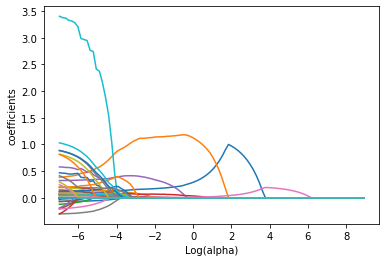

In [76]:
alphas_lasso, coefs_lasso, _ = lasso_path(X3, y)
alphas_lasso2 = np.logspace(np.log(alphas_lasso.max()/10), np.log(alphas_lasso.min()/10), num=100)
_, coefs_lasso2, _ = lasso_path(X3, y, alphas=alphas_lasso2)
path_plot(coefs_lasso2, alphas_lasso2)

# Ridge

In [ ]:
alphas_ridge = np.logspace(-6, 6, 100)
clf = sklearn.linear_model.Ridge()
coefs_ridge = []
# Train the model with different regularisation strengths
for a in alphas_ridge:
    clf.set_params(alpha=a)
    clf.fit(X3, y)
    coefs_ridge.append(clf.coef_)

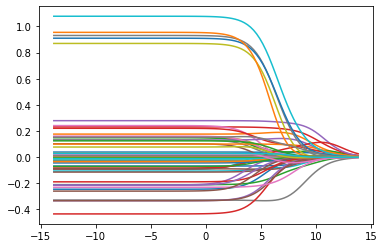

In [39]:
#path_plot(coefs_ridge, alphas_ridge)
neg_log_alphas = -np.log(alphas_ridge)
plt.figure()
l1 = plt.plot(np.log(alphas_ridge), coefs_ridge)